In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('crop_datanew.csv')
df.head()

,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Soil_Type,Season,Water_Usage(cubic meters),Temperature(°C),Humidity(%),Yield(tons),Nutrient_Content,Rainfall(mm),Sunlight_Hours,Soil_pH,Soil_Moisture_Level
0,1,Barley,41,Sprinkler,Sandy,Winter,3708,38.8,30,9.8,87.45,241.35,6.69,6.12,73.08
1,2,Soybean,28,Drip,Sandy,Spring,4152,24.0,48,12.5,145.07,625.08,7.79,5.58,21.72
2,3,Corn,33,Sprinkler,Loamy,Winter,2750,36.4,60,11.2,123.20,632.51,6.77,6.04,21.55
3,4,Soybean,35,Sprinkler,Clay,Summer,2508,10.2,43,8.0,109.87,709.94,5.89,7.25,42.65
4,5,Soybean,39,Drip,Loamy,Summer,3421,34.6,82,9.3,65.60,780.87,6.21,6.76,54.21


In [5]:
df.shape



(300, 15)

In [6]:
df.isnull().sum()


Farm_ID                      0
Crop_Type                    0
Farm_Area(acres)             0
Irrigation_Type              0
Soil_Type                    0
Season                       0
Water_Usage(cubic meters)    0
Temperature(°C)              0
Humidity(%)                  0
Yield(tons)                  0
Nutrient_Content             0
Rainfall(mm)                 0
Sunlight_Hours               0
Soil_pH                      0
Soil_Moisture_Level          0
dtype: int64

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Farm_ID                    300 non-null    int64  
 1   Crop_Type                  300 non-null    object 
 2   Farm_Area(acres)           300 non-null    int64  
 3   Irrigation_Type            300 non-null    object 
 4   Soil_Type                  300 non-null    object 
 5   Season                     300 non-null    object 
 6   Water_Usage(cubic meters)  300 non-null    int64  
 7   Temperature(°C)            300 non-null    float64
 8   Humidity(%)                300 non-null    int64  
 9   Yield(tons)                300 non-null    float64
 10  Nutrient_Content           300 non-null    float64
 11  Rainfall(mm)               300 non-null    float64
 12  Sunlight_Hours             300 non-null    float64
 13  Soil_pH                    300 non-null    float64

In [8]:
# Handle Missing Values
df['Water_Usage(cubic meters)'] = df['Water_Usage(cubic meters)'].fillna(df['Water_Usage(cubic meters)'].mean())


In [9]:
df.duplicated().sum()


np.int64(0)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
# Encode Categorical Data
df = pd.get_dummies(df, columns=['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season'], drop_first=True)


In [12]:
df.describe()

,Farm_ID,Farm_Area(acres),Water_Usage(cubic meters),Temperature(°C),Humidity(%),Yield(tons),Nutrient_Content,Rainfall(mm),Sunlight_Hours,Soil_pH,Soil_Moisture_Level
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,27.773333,2962.096667,24.865000,62.943333,9.873333,99.520533,608.665033,9.710867,7.058467,55.011200
std,86.746758,12.676920,1198.540531,8.621064,20.401656,2.913701,29.434010,242.072319,2.834222,0.890307,20.456785
min,1.000000,5.000000,1002.000000,10.000000,30.000000,5.000000,50.510000,208.670000,5.050000,5.520000,20.350000
25%,75.750000,17.000000,1920.000000,17.075000,45.000000,7.300000,73.910000,399.687500,7.097500,6.277500,36.602500
50%,150.500000,29.000000,2912.000000,24.950000,61.500000,9.900000,101.170000,617.365000,9.525000,7.140000,54.630000
75%,225.250000,39.000000,4110.250000,32.150000,78.000000,12.425000,125.690000,818.670000,12.170000,7.862500,71.377500
max,300.000000,49.000000,4993.000000,39.800000,99.000000,14.900000,149.010000,999.770000,14.970000,8.490000,89.960000


<Axes: xlabel='count', ylabel='Farm_Area(acres)'>

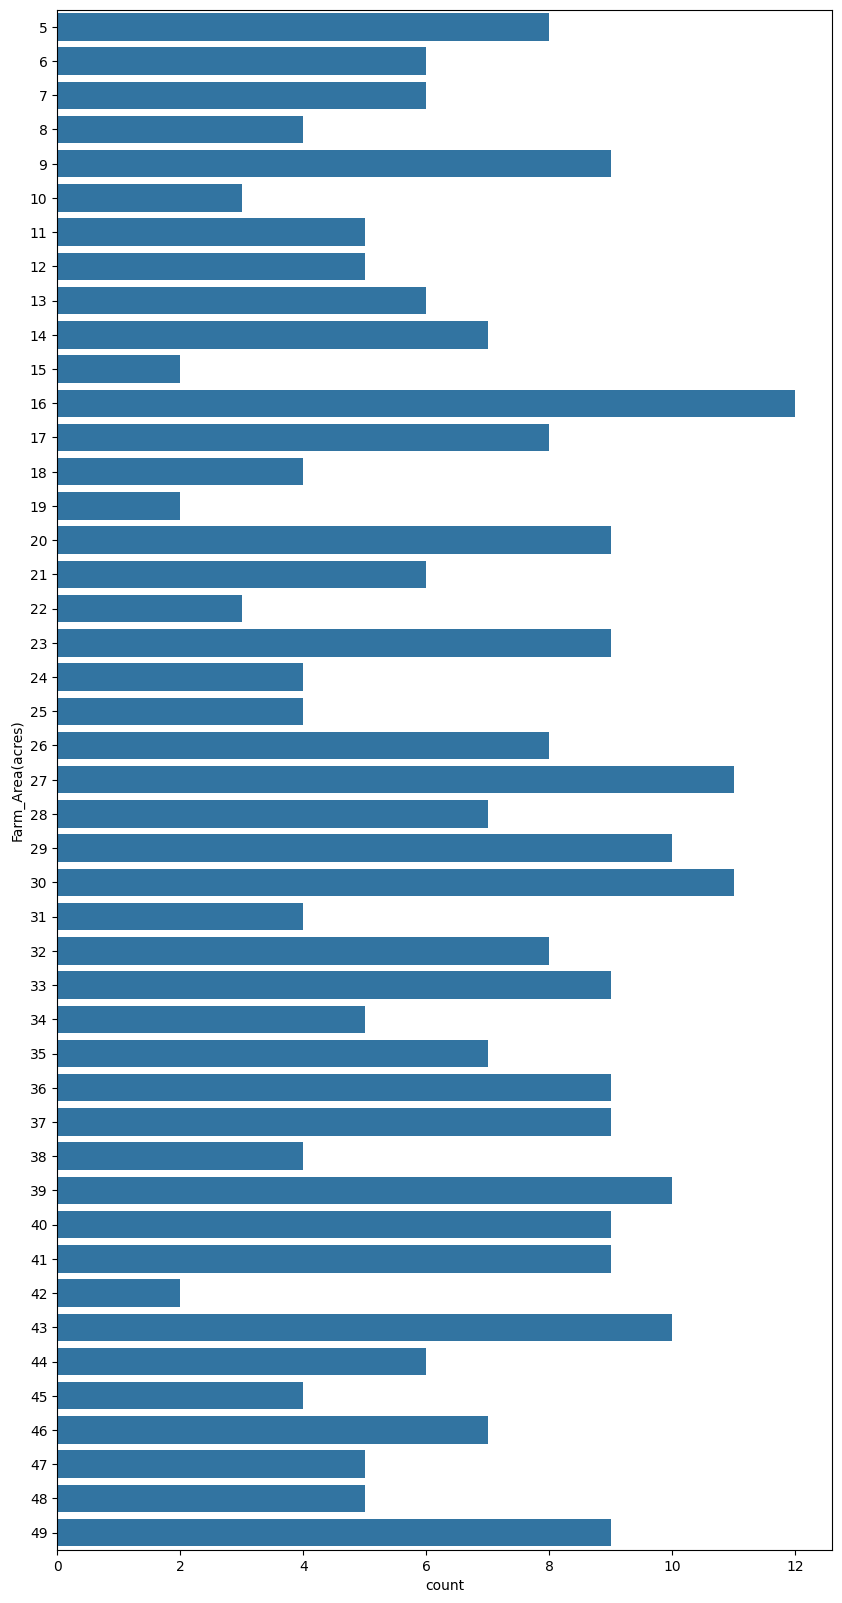

In [13]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['Farm_Area(acres)'])

In [14]:
#Feature Scaling- Standardization (Recommended for algorithms like SVM, KNN)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Farm_Area(acres)', 'Water_Usage(cubic meters)', 'Temperature(°C)', 'Humidity(%)']] = \
    scaler.fit_transform(df[['Farm_Area(acres)', 'Water_Usage(cubic meters)', 'Temperature(°C)', 'Humidity(%)']])


In [15]:
#  Outlier Detection
Q1 = df['Yield(tons)'].quantile(0.25)
Q3 = df['Yield(tons)'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df['Yield(tons)'] < (Q1 - 1.5 * IQR)) | (df['Yield(tons)'] > (Q3 + 1.5 * IQR)))]


In [16]:
#  Splitting the Data
from sklearn.model_selection import train_test_split

# Features and Target
X = df.drop('Yield(tons)', axis=1)
y = df['Yield(tons)']

# Split into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
print(df['Yield(tons)'].dtype)


float64


In [18]:
df['Yield(tons)'] = pd.to_numeric(df['Yield(tons)'], errors='coerce')


In [19]:
print(df['Yield(tons)'].isna().sum())


0


In [20]:
df = df.assign(Yield=df['Yield(tons)'].fillna(df['Yield(tons)'].mean()))



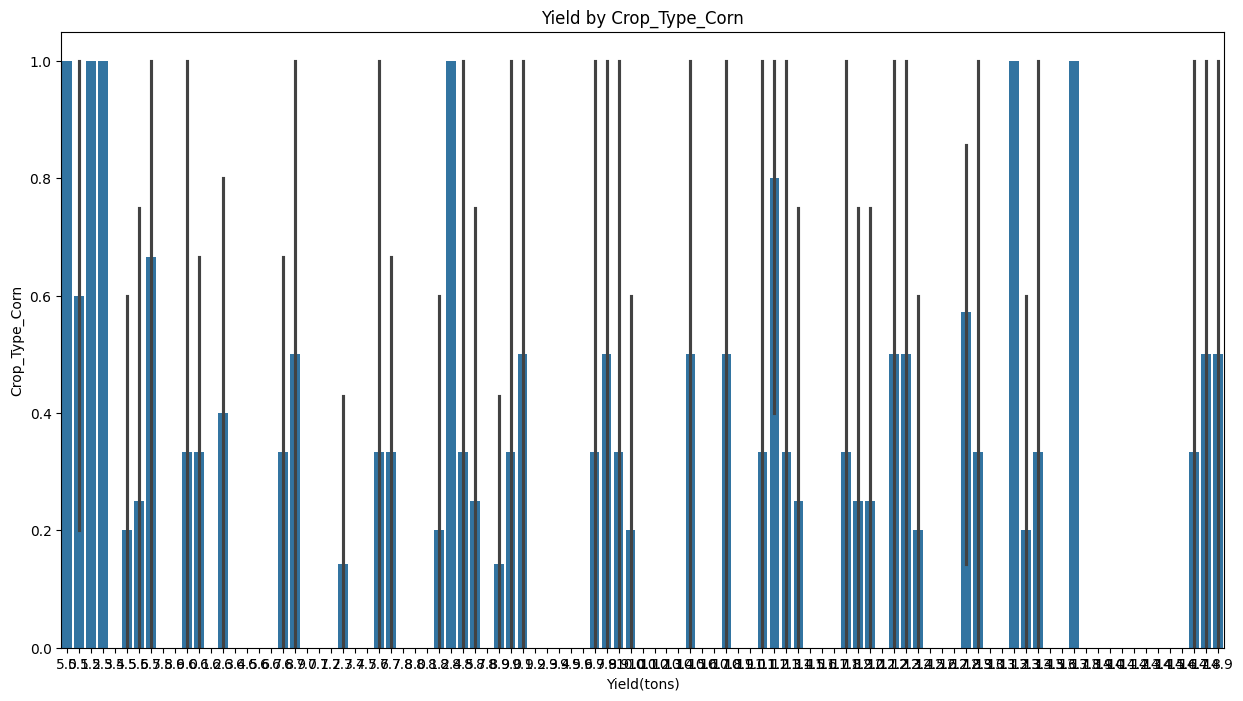

In [21]:
encoded_columns = [col for col in df.columns if 'Crop_Type' in col]

plt.figure(figsize=(15, 8))
sns.barplot(x='Yield(tons)', y=encoded_columns[0], data=df)  
plt.title(f"Yield by {encoded_columns[0]}")
plt.show()



**random forest regression**

In [30]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Splitting data
X = df.drop('Yield(tons)', axis=1)
y = df['Yield(tons)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R² Score: {r2_score(y_test, y_pred):.2f}')


MSE: 8.77
R² Score: -0.01


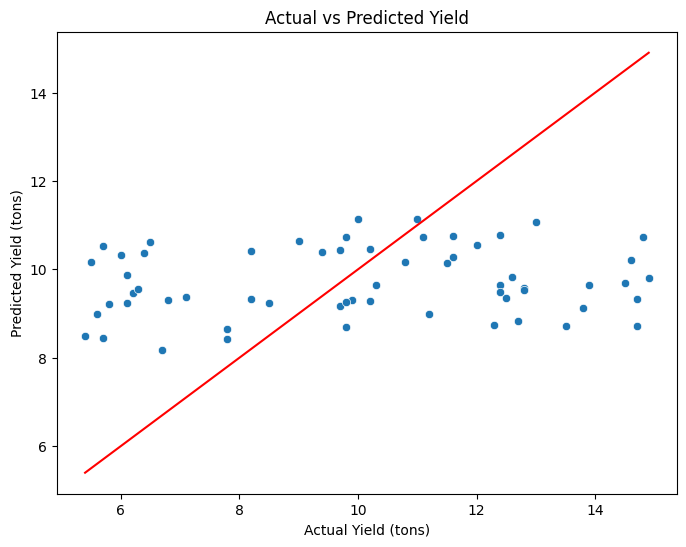

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ideal prediction line
plt.title("Actual vs Predicted Yield")
plt.xlabel("Actual Yield (tons)")
plt.ylabel("Predicted Yield (tons)")
plt.show()


**Linear regression**

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
df = pd.read_csv('crop_datanew.csv')

# Handle missing values
df['Crop_Type'].fillna(df['Crop_Type'].mode()[0], inplace=True)
df['Water_Usage(cubic meters)'].fillna(df['Water_Usage(cubic meters)'].mean(), inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season'], drop_first=True)

# Features (X) and Target (y)
X = df.drop('Yield(tons)', axis=1)
y = df['Yield(tons)']

# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\Dell\AppData\Local\Temp\ipykernel_5140\390137956.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Crop_Type'].fillna(df['Crop_Type'].mode()[0], inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_5140\390137956.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [32]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [33]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R² Score: {r2:.2f}')


Mean Squared Error (MSE): 8.76
Root Mean Squared Error (RMSE): 2.96
R² Score: -0.01


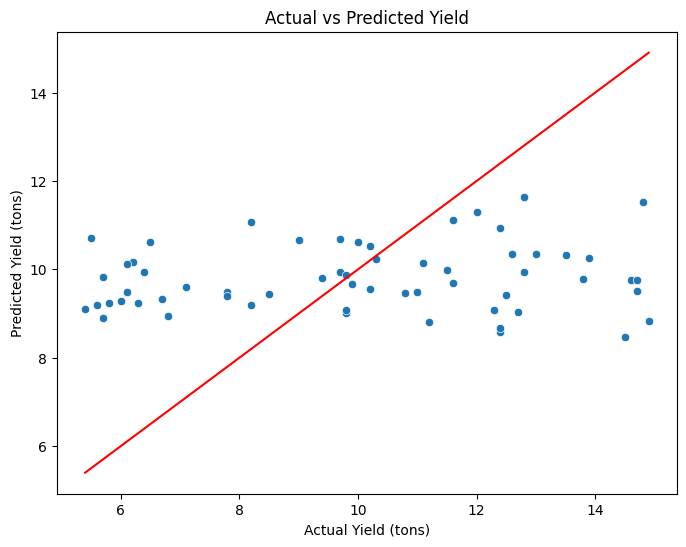

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ideal prediction line
plt.title("Actual vs Predicted Yield")
plt.xlabel("Actual Yield (tons)")
plt.ylabel("Predicted Yield (tons)")
plt.show()


**Gradient boosting**

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('crop_datanew.csv')  # Update with your dataset file

# Handling missing values
df['Crop_Type'] = df['Crop_Type'].fillna(df['Crop_Type'].mode()[0])
df['W Water_Usage(cubic meters) '] = df['Water_Usage(cubic meters)'].fillna(df['Water_Usage(cubic meters)'].mean())


# Encoding categorical variables
df = pd.get_dummies(df, columns=['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season'], drop_first=True)

# Features and target selection
X = df.drop('Yield(tons)', axis=1)  # Features
y = df['Yield(tons)']              # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Model
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
gbr.fit(X_train, y_train)

# Predictions
y_pred = gbr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 11.75
Root Mean Squared Error (RMSE): 3.43
R² Score: -0.35


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Farm_ID                    300 non-null    int64  
 1   Crop_Type                  300 non-null    object 
 2   Farm_Area(acres)           300 non-null    int64  
 3   Irrigation_Type            300 non-null    object 
 4   Soil_Type                  300 non-null    object 
 5   Season                     300 non-null    object 
 6   Water_Usage(cubic meters)  300 non-null    int64  
 7   Temperature(°C)            300 non-null    float64
 8   Humidity(%)                300 non-null    int64  
 9   Yield(tons)                300 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 23.6+ KB


**Gaussian Mixture Model**

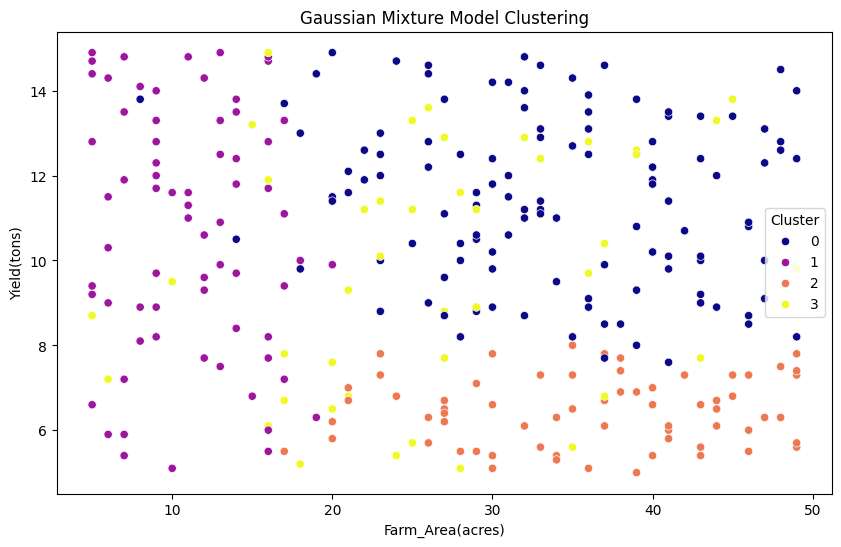

In [36]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Selecting numerical features only for scaling
features_to_scale = ['Farm_Area(acres)', 'Water_Usage(cubic meters)', 'Temperature(°C)', 'Humidity(%)', 'Yield(tons)']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features_to_scale])

# Convert back to DataFrame for clarity
scaled_data = pd.DataFrame(scaled_data, columns=features_to_scale)

gmm = GaussianMixture(n_components=4, random_state=42)
df['Cluster'] = gmm.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Farm_Area(acres)', y='Yield(tons)', hue='Cluster', data=df, palette='plasma')
plt.title('Gaussian Mixture Model Clustering')
plt.show()


In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Farm_ID                       300 non-null    int64  
 1   Farm_Area(acres)              300 non-null    int64  
 2   Water_Usage(cubic meters)     300 non-null    int64  
 3   Temperature(°C)               300 non-null    float64
 4   Humidity(%)                   300 non-null    int64  
 5   Yield(tons)                   300 non-null    float64
 6   Nutrient_Content              300 non-null    float64
 7   Rainfall(mm)                  300 non-null    float64
 8   Sunlight_Hours                300 non-null    float64
 9   Soil_pH                       300 non-null    float64
 10  Soil_Moisture_Level           300 non-null    float64
 11  W Water_Usage(cubic meters)   300 non-null    int64  
 12  Crop_Type_Corn                300 non-null    bool   
 13  Crop_

**K-means clustering**

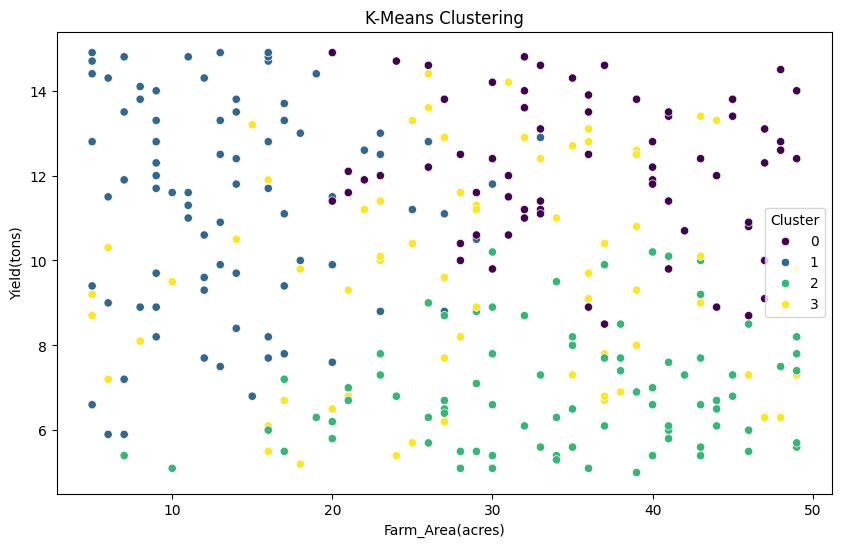

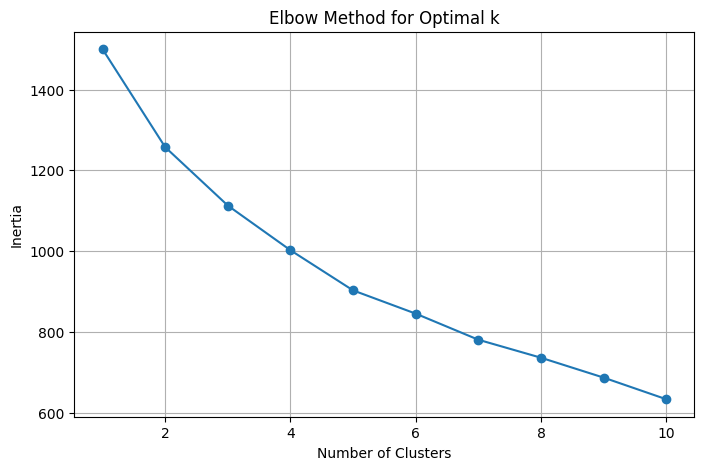

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# K-Means Clustering Model
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust n_clusters as needed
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Farm_Area(acres)', y='Yield(tons)', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# Finding the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [40]:
import pandas as pd

# Load your dataset
df = pd.read_csv("crop_datanew.csv")  # Update the path accordingly

# Check the first few rows to verify
print(df.head())


   Farm_ID Crop_Type  Farm_Area(acres) Irrigation_Type Soil_Type  Season  \
0        1    Barley                41       Sprinkler     Sandy  Winter   
1        2   Soybean                28            Drip     Sandy  Spring   
2        3      Corn                33       Sprinkler     Loamy  Winter   
3        4   Soybean                35       Sprinkler      Clay  Summer   
4        5   Soybean                39            Drip     Loamy  Summer   

   Water_Usage(cubic meters)  Temperature(°C)  Humidity(%)  Yield(tons)  \
0                       3708             38.8           30          9.8   
1                       4152             24.0           48         12.5   
2                       2750             36.4           60         11.2   
3                       2508             10.2           43          8.0   
4                       3421             34.6           82          9.3   

   Nutrient_Content  Rainfall(mm)  Sunlight_Hours  Soil_pH  \
0             87.45        241

**MODEL UPLOADING**


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib
import pickle
import os

# Load dataset
df = pd.read_csv('crop_datanew.csv')

# Encode categorical columns
categorical_columns = ['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season']
df = pd.get_dummies(df, columns=categorical_columns)

# Identify new encoded columns
encoded_columns = [col for col in df.columns if col.startswith(('Crop_Type_', 'Irrigation_Type_', 'Soil_Type_', 'Season_'))]

# Define features and target
feature_columns = ['Farm_Area(acres)', 'Temperature(°C)', 'Humidity(%)', 'Water_Usage(cubic meters)',
                   'Nutrient_Content', 'Rainfall(mm)', 'Sunlight_Hours', 'Soil_pH', 'Soil_Moisture_Level'] + encoded_columns
X = df[feature_columns]
y = df['Yield(tons)']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Create models folder if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save model using both joblib and pickle (use either in app)
joblib.dump(model, 'models/crop_yield_model.pkl')
pickle.dump(model, open('models/crop_yield_model_lr.pkl', 'wb'))

# Save model columns for consistent prediction input
pickle.dump(X.columns.tolist(), open('models/model_columns.pkl', 'wb'))

print("✅ Model retrained and saved successfully!")
print("🧠 Model path: models/crop_yield_model.pkl")
print("📊 Columns saved: models/model_columns.pkl")


✅ Model retrained and saved successfully!
🧠 Model path: models/crop_yield_model.pkl
📊 Columns saved: models/model_columns.pkl


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import OneHotEncoder
# import joblib

# # Load your dataset
# df = pd.read_csv('crop_data.csv')

# # Encode categorical columns (including 'Irrigation_Type')
# categorical_columns = ['Crop_Type', 'Soil_Type', 'Season', 'Irrigation_Type']
# df = pd.get_dummies(df, columns=categorical_columns)

# # Define features and target
# X = df.drop('Yield(tons)', axis=1)
# y = df['Yield(tons)']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Model training
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Model evaluation
# y_pred = model.predict(X_test)
# print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
# print(f"R-squared: {r2_score(y_test, y_pred):.2f}")

# # Save the trained model
# joblib.dump(model, 'models/crop_yield_model_lr.pkl')
# print("✅ Linear Regression model saved successfully!")

# added feature code
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# import joblib

# # Load the dataset
# df = pd.read_csv('crop_datanew.csv')

# # Encode categorical columns correctly
# categorical_columns = ['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season']
# df = pd.get_dummies(df, columns=categorical_columns)

# # Define features and target
# X = df[['Farm_Area(acres)', 'Water_Usage(cubic meters)', 'Temperature(°C)',
#         'Humidity(%)', 'Nutrient_Content', 'Rainfall(mm)',
#         'Sunlight_Hours', 'Soil_pH', 'Soil_Moisture_Level']]
# y = df['Yield(tons)']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Model training
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Save the trained model
# joblib.dump(model, 'models/linear_regression_model.pkl')
# print("✅ Linear Regression model saved successfully!")



✅ Linear Regression model saved successfully!


In [4]:
import joblib
joblib.dump(model, 'models/crop_yield_model.pkl')


['models/crop_yield_model.pkl']

In [9]:
model = joblib.load('models/crop_yield_model.pkl')


In [10]:
import os
model_path = os.path.join(os.getcwd(), 'models', 'crop_yield_model.pkl')
model = joblib.load(model_path)


In [11]:
import os
model_path = os.path.join(os.getcwd(), 'models', 'crop_yield_model.pkl')

if os.path.exists(model_path):
    print(f"✅ Model found at: {model_path}")
    model = joblib.load(model_path)
else:
    print(f"❌ Model NOT found at: {model_path}")


✅ Model found at: c:\Users\Dell\OneDrive\Desktop\HDMINIclg\models\crop_yield_model.pkl


In [8]:
import joblib
import os

model_path = os.path.join(os.getcwd(), 'models', 'crop_yield_model.pkl')
model = joblib.load(model_path)


In [9]:
joblib.dump(model, os.path.join('models', 'crop_yield_model.pkl'))


['models\\crop_yield_model.pkl']

In [14]:
import os

model_path = 'models/crop_yield_model.pkl'
print(f"Model exists: {os.path.exists(model_path)}")
print(f"Full Path: {os.path.abspath(model_path)}")


Model exists: True
Full Path: c:\Users\Dell\OneDrive\Desktop\HDMINIclg\models\crop_yield_model.pkl


In [7]:
import joblib
import os

model_path = os.path.join(os.getcwd(), 'models', 'crop_yield_model.pkl')
print(f"Loading model from: {model_path}")
model = joblib.load(model_path)


Loading model from: c:\Users\Dell\OneDrive\Desktop\HDMINIclg\models\crop_yield_model.pkl


In [16]:
import os

model_path = 'models/crop_yield_model.pkl'
print(f"Readable: {os.access(model_path, os.R_OK)}")
print(f"Writable: {os.access(model_path, os.W_OK)}")


Readable: True
Writable: True


In [3]:
from flask import Flask, request, render_template, send_from_directory
import os  # Required to define path correctly


In [2]:
import joblib

model_path = r'c:\Users\Dell\OneDrive\Desktop\HDMINIclg\models\crop_yield_model.pkl'
model = joblib.load(model_path)


In [4]:
import joblib
joblib.dump(model, 'models/crop_yield_model.pkl', compress=3)  # Compression helps reduce corruption risk


['models/crop_yield_model.pkl']

In [5]:
import joblib

model_path = r'c:\Users\Dell\OneDrive\Desktop\HDMINIclg\models\crop_yield_model.pkl'
model = joblib.load(model_path)
